In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path_and_file = 'data\\dataset_wildfires\\FPA_FOD_20170508.sqlite'

def get_table_names(connection):
    cursor = connection.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    table_list = cursor.fetchall()
    return [item[0] for item in table_list]

In [8]:
db = sqlite3.connect(path_and_file)
table_names = get_table_names(db)
table_names

['spatial_ref_sys',
 'spatialite_history',
 'sqlite_sequence',
 'geometry_columns',
 'spatial_ref_sys_aux',
 'views_geometry_columns',
 'virts_geometry_columns',
 'geometry_columns_statistics',
 'views_geometry_columns_statistics',
 'virts_geometry_columns_statistics',
 'geometry_columns_field_infos',
 'views_geometry_columns_field_infos',
 'virts_geometry_columns_field_infos',
 'geometry_columns_time',
 'geometry_columns_auth',
 'views_geometry_columns_auth',
 'virts_geometry_columns_auth',
 'sql_statements_log',
 'SpatialIndex',
 'ElementaryGeometries',
 'KNN',
 'Fires',
 'idx_Fires_Shape',
 'idx_Fires_Shape_node',
 'idx_Fires_Shape_rowid',
 'idx_Fires_Shape_parent',
 'NWCG_UnitIDActive_20170109']

In [9]:
df = pd.read_sql_query('select * from Fires', db)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 39 columns):
OBJECTID                      int64
FOD_ID                        int64
FPA_ID                        object
SOURCE_SYSTEM_TYPE            object
SOURCE_SYSTEM                 object
NWCG_REPORTING_AGENCY         object
NWCG_REPORTING_UNIT_ID        object
NWCG_REPORTING_UNIT_NAME      object
SOURCE_REPORTING_UNIT         object
SOURCE_REPORTING_UNIT_NAME    object
LOCAL_FIRE_REPORT_ID          object
LOCAL_INCIDENT_ID             object
FIRE_CODE                     object
FIRE_NAME                     object
ICS_209_INCIDENT_NUMBER       object
ICS_209_NAME                  object
MTBS_ID                       object
MTBS_FIRE_NAME                object
COMPLEX_NAME                  object
FIRE_YEAR                     int64
DISCOVERY_DATE                float64
DISCOVERY_DOY                 int64
DISCOVERY_TIME                object
STAT_CAUSE_CODE               float64
S

In [11]:
df.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [22]:
file = open('data/big_cities.pickle', 'rb')
cities = pickle.load(file)
file.close()
cities.head()

,city,population,lat,lng
106,Seattle,3643765.0,47.6211,-122.3244
697,Washington,5289420.0,38.9047,-77.0163
2065,Tampa,2804240.0,27.9942,-82.4451
2882,Miami,6381966.0,25.7839,-80.2102
4464,Dallas,5733259.0,32.7936,-96.7662


In [27]:
lat_range = max(df.LATITUDE) - min(df.LATITUDE)
lng_range = max(df.LONGITUDE) - min(df.LONGITUDE)
print(lng_range, lat_range)

113.54565556000001 52.390877780000004


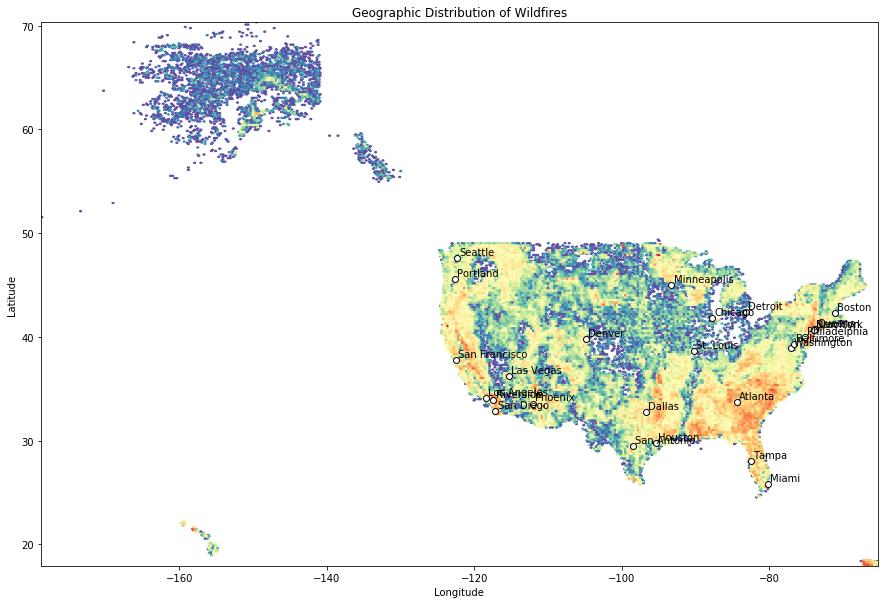

In [29]:
# Visualize latitude and longitude of all fires
_ = plt.figure(figsize = (15,10))
_ = plt.hexbin(df.LONGITUDE, df.LATITUDE, gridsize = 400, bins = 'log', mincnt = 1, cmap = 'Spectral_r')
#_ = plt.colorbar()
for name, latitude, longitude in zip(cities.city, cities.lat, cities.lng):
    plt.scatter(longitude, latitude, marker = 'o', edgecolor = 'k', c = 'w')
    plt.text(longitude+0.3, latitude+0.3, name)
_ = plt.xlabel('Longitude')
_ = plt.ylabel('Latitude')
_ = plt.title('Geographic Distribution of Wildfires')

In [33]:
years = sorted(df.FIRE_YEAR.unique())
len(years)

24

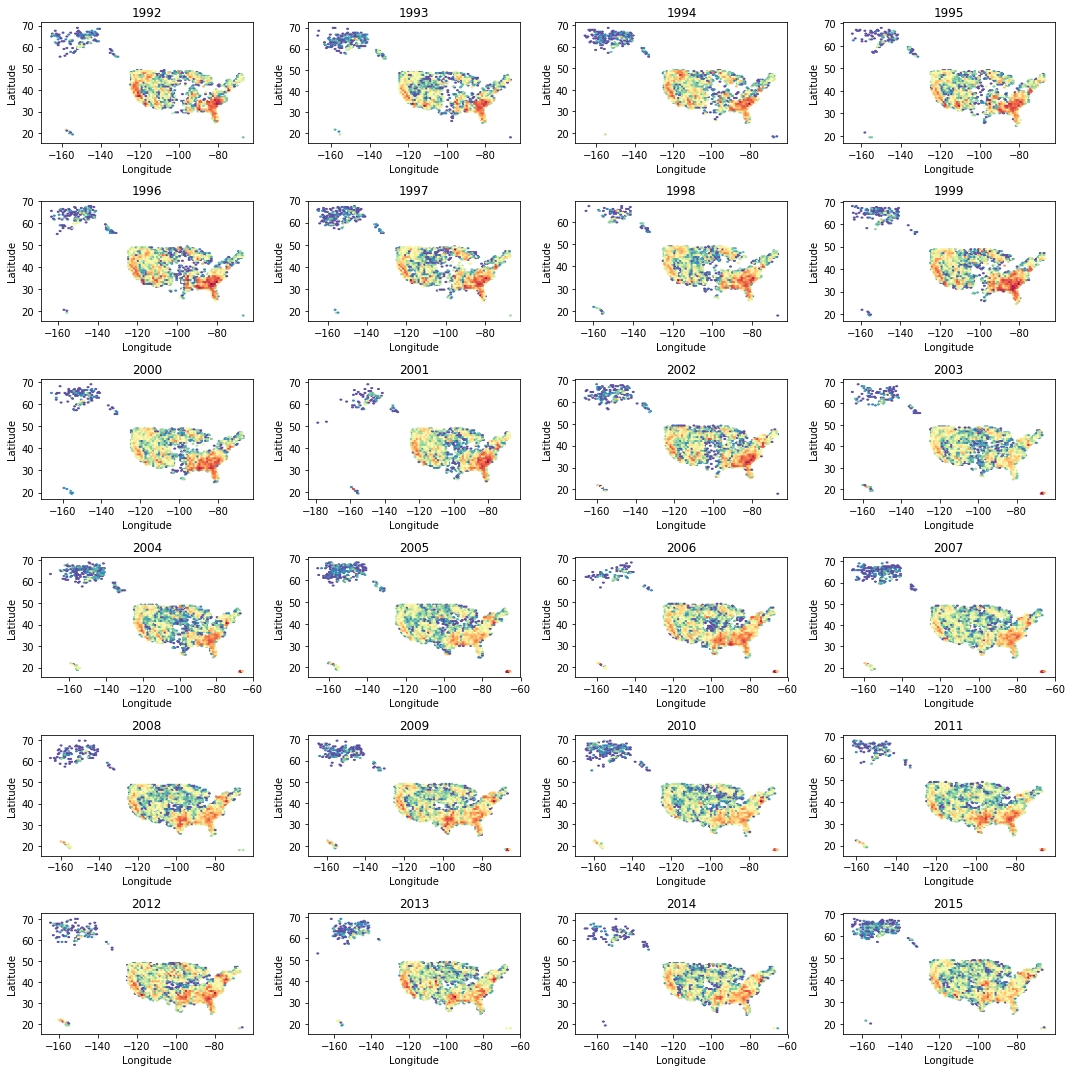

In [36]:
_ = plt.figure(figsize = (15,15))
for idx, year in enumerate(years):
    _ = plt.subplot(6,4,idx+1)
    _ = plt.hexbin(df.LONGITUDE[df.FIRE_YEAR == year], df.LATITUDE[df.FIRE_YEAR == year], 
                   gridsize = 100, bins = 'log', mincnt = 1, cmap = 'Spectral_r')
    _ = plt.xlabel('Longitude')
    _ = plt.ylabel('Latitude')
    _ = plt.title(year)
_ = plt.tight_layout()

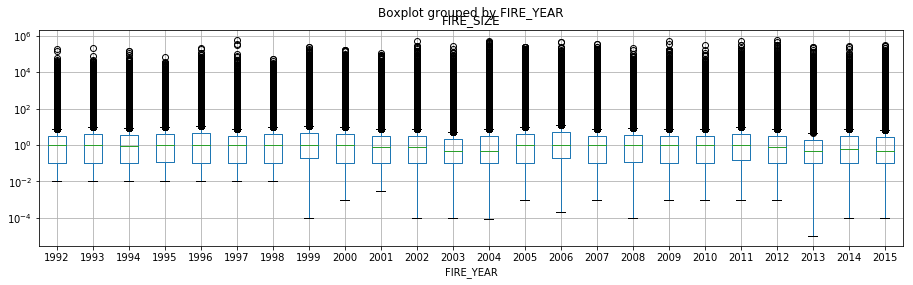

In [44]:
_ = df.boxplot(column = 'FIRE_SIZE', by = 'FIRE_YEAR', figsize = (15, 4))
_ = plt.yscale('log')

In [50]:
df.pivot_table(index = 'STATE', columns = 'FIRE_SIZE_CLASS', values = 'OBJECTID', aggfunc = 'count').sort_values('G', ascending = False)

FIRE_SIZE_CLASS,A,B,C,D,E,F,G
STATE,,,,,,,
AK,6622.0,3386.0,1045.0,349.0,378.0,413.0,650.0
CA,98309.0,76942.0,9825.0,2137.0,1187.0,756.0,394.0
ID,20706.0,10446.0,2587.0,1062.0,810.0,693.0,394.0
NV,9321.0,4529.0,1505.0,483.0,416.0,407.0,295.0
OR,43495.0,13831.0,2098.0,638.0,417.0,353.0,256.0
TX,18127.0,91843.0,25452.0,3782.0,1781.0,798.0,238.0
NM,17459.0,14108.0,3545.0,927.0,710.0,493.0,236.0
MT,23229.0,13082.0,2650.0,691.0,518.0,374.0,223.0
AZ,42694.0,23052.0,3821.0,839.0,591.0,413.0,176.0


In [51]:
df.pivot_table(index = 'STATE', values = 'CONT_TIME', aggfunc = 'median')

DataError: No numeric types to aggregate

In [57]:
t = df[['FIRE_YEAR','DISCOVERY_DATE','DISCOVERY_DOY','DISCOVERY_TIME','CONT_DATE','CONT_DOY','CONT_TIME']].head(20)

t.CONT_DATE - t.DISCOVERY_DATE

0      0.0
1      0.0
2      0.0
3      5.0
4      5.0
5      1.0
6      1.0
7      0.0
8      0.0
9      1.0
10     1.0
11     1.0
12     0.0
13     0.0
14     0.0
15     0.0
16    15.0
17     4.0
18     1.0
19     0.0
dtype: float64

In [58]:
from datetime import datetime
d_time = df.DISCOVERY_TIME

0          1300
1          0845
2          1921
3          1600
4          1600
5          1800
6          1800
7          1300
8          1200
9          1800
10         1830
11         1730
12         1600
13         1200
14         0630
15         0930
16         1415
17         1618
18         2000
19         1030
20         1530
21         1440
22         1910
23         1250
24         1712
25         1405
26         1145
27         0945
28         1655
29         1515
           ... 
1880435    1202
1880436    1138
1880437    1645
1880438    1625
1880439    1200
1880440    2311
1880441    1512
1880442    1656
1880443    0536
1880444    1545
1880445    1233
1880446    1943
1880447    0041
1880448    1752
1880449    1737
1880450    0337
1880451    1208
1880452    0827
1880453    0723
1880454    0638
1880455    2042
1880456    1714
1880457    2357
1880458    1331
1880459    1420
1880460    1726
1880461    0126
1880462    2052
1880463    2309
1880464    2128
Name: DISCOVERY_TIME, Le